
# üíæ –î–∞–Ω–Ω—ã–µ
–ë–µ—Ä–µ–º –¥–∞–Ω–Ω—ã–µ –∏–∑ [–∫—ç–≥–ª–∞](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

In [1]:
!pip install -q hvplot

# üì§ –ò–º–ø–æ—Ä—Ç–∏—Ä—É–µ–º –ª–∏–±—ã

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas

%matplotlib inline

# sns.set_style("whitegrid")
# plt.style.use("fivethirtyeight")

 ## –î–∞–Ω–Ω—ã–µ —Å –∫–æ—Ç–æ—Ä—ã–º–∏ —Ä–∞–±–æ—Ç–∞–µ–º: https://www.kaggle.com/code/ryanholbrook/feature-engineering-for-house-prices/

## üíæ –°–º–æ—Ç—Ä–∏–º –¥–∞—Ç—É

In [3]:
sample = pd.read_csv('/content/sample_submission.csv')
df = pd.read_csv('/content/train.csv')
df_test = pd.read_csv('/content/test.csv')

df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [5]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# üìä EDA



In [6]:
df.hvplot.hist("SalePrice")

:Histogram   [SalePrice]   (Count)

#–û–±—Ä–∞–±–æ—Ç–∫–∞ –ø–µ—Ä–µ–¥ –æ–±—É—á–µ–Ω–∏–µ–º


###–ö–∞—Ç–µ–≥–æ—Ä–∏–∏
**Label Encoding** –ø—Ä–æ—Å—Ç–æ –ø—Ä–∏—Å–≤–∞–∏–≤–∞–µ—Ç –∫–∞–∂–¥–æ–π –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ —á–∏—Å–ª–æ, —á—Ç–æ –º–æ–∂–µ—Ç –±—ã—Ç—å —É–¥–æ–±–Ω–æ –¥–ª—è —É–ø–æ—Ä—è–¥–æ—á–µ–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö, –Ω–æ –Ω–µ–∂–µ–ª–∞—Ç–µ–ª—å–Ω–æ –¥–ª—è –Ω–µ—É–ø–æ—Ä—è–¥–æ—á–µ–Ω–Ω—ã—Ö.  
**One-Hot Encoding** –ø—Ä–µ–≤—Ä–∞—â–∞–µ—Ç –∫–∞–∂–¥—É—é –∫–∞—Ç–µ–≥–æ—Ä–∏—é –≤ –æ—Ç–¥–µ–ª—å–Ω—ã–π –±–∏–Ω–∞—Ä–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫, —á—Ç–æ —É—Å—Ç—Ä–∞–Ω—è–µ—Ç –ª–æ–∂–Ω—ã–π –ø–æ—Ä—è–¥–æ–∫, –Ω–æ —É–≤–µ–ª–∏—á–∏–≤–∞–µ—Ç —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å –¥–∞–Ω–Ω—ã—Ö.
###–ß–∏—Å–ª–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏
**–ú–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–∏–µ (scaling)** ‚Äì —ç—Ç–æ –ø—Ä–æ—Ü–µ—Å—Å –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è —á–∏—Å–ª–æ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —Ç–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º, —á—Ç–æ–±—ã –æ–Ω–∏ –Ω–∞—Ö–æ–¥–∏–ª–∏—Å—å –≤ —Å—Ö–æ–∂–µ–º –¥–∏–∞–ø–∞–∑–æ–Ω–µ –∏–ª–∏ –∏–º–µ–ª–∏ —Å—Ö–æ–∂–∏–µ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏–µ —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫–∏. –≠—Ç–æ –≤–∞–∂–Ω–æ, –ø–æ—Å–∫–æ–ª—å–∫—É –º–Ω–æ–≥–∏–µ –∞–ª–≥–æ—Ä–∏—Ç–º—ã –º–∞—à–∏–Ω–Ω–æ–≥–æ –æ–±—É—á–µ–Ω–∏—è (–Ω–∞–ø—Ä–∏–º–µ—Ä, –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–π —Å–ø—É—Å–∫, KNN, SVM) —á—É–≤—Å—Ç–≤–∏—Ç–µ–ª—å–Ω—ã –∫ —Ä–∞–∑–Ω–∏—Ü–µ –≤ –º–∞—Å—à—Ç–∞–±–∞—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤. –ù–∏–∂–µ –ø—Ä–∏–≤–µ–¥–µ–Ω–æ –æ–±—ä—è—Å–Ω–µ–Ω–∏–µ –æ—Å–Ω–æ–≤–Ω—ã—Ö –∞—Å–ø–µ–∫—Ç–æ–≤ –º–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–∏—è:

### –û—Å–Ω–æ–≤–Ω—ã–µ –º–µ—Ç–æ–¥—ã –º–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–∏—è

1. **–°—Ç–∞–Ω–¥–∞—Ä—Ç–∏–∑–∞—Ü–∏—è (Standard Scaling):**  
   –ú–µ—Ç–æ–¥, —Ä–µ–∞–ª–∏–∑–æ–≤–∞–Ω–Ω—ã–π –≤ `StandardScaler`, –ø—Ä–µ–æ–±—Ä–∞–∑—É–µ—Ç –∫–∞–∂–¥—ã–π –ø—Ä–∏–∑–Ω–∞–∫ –ø–æ —Ñ–æ—Ä–º—É–ª–µ:
   $$
   x_{\text{scaled}} = \frac{x - \mu}{\sigma}
   $$
   –≥–¥–µ:
   - $ \mu $ ‚Äì —Å—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–∞,
   - $ \sigma $ ‚Äì —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–∞.

   **–†–µ–∑—É–ª—å—Ç–∞—Ç:** –ø—Ä–∏–∑–Ω–∞–∫–∏ –ø–æ–ª—É—á–∞—Ç —Å—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ 0 –∏ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ 1. –≠—Ç–æ –æ—Å–æ–±–µ–Ω–Ω–æ –ø–æ–ª–µ–∑–Ω–æ, –µ—Å–ª–∏ –¥–∞–Ω–Ω—ã–µ –ø—Ä–∏–±–ª–∏–∑–∏—Ç–µ–ª—å–Ω–æ –Ω–æ—Ä–º–∞–ª—å–Ω–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω—ã.

2. **–ù–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è (Min-Max Scaling):**  
   –ü—Ä–∏–≤–æ–¥–∏—Ç –∑–Ω–∞—á–µ–Ω–∏—è –ø—Ä–∏–∑–Ω–∞–∫–∞ –∫ –æ–ø—Ä–µ–¥–µ–ª—ë–Ω–Ω–æ–º—É –¥–∏–∞–ø–∞–∑–æ–Ω—É, –Ω–∞–ø—Ä–∏–º–µ—Ä, –æ—Ç 0 –¥–æ 1. –§–æ—Ä–º—É–ª–∞:
   $$
   x_{\text{scaled}} = \frac{x - x_{\text{min}}}{x_{\text{max}} - x_{\text{min}}}
   $$
   –≠—Ç–æ—Ç –º–µ—Ç–æ–¥ –ø–æ–ª–µ–∑–µ–Ω, –∫–æ–≥–¥–∞ —Ç—Ä–µ–±—É–µ—Ç—Å—è –æ–≥—Ä–∞–Ω–∏—á–∏—Ç—å –∑–Ω–∞—á–µ–Ω–∏—è –≤ –∑–∞–¥–∞–Ω–Ω–æ–º –∏–Ω—Ç–µ—Ä–≤–∞–ª–µ.

**–õ–æ–≥–∞—Ä–∏—Ñ–º–∏—Ä–æ–≤–∞–Ω–∏–µ**      
–õ–æ–≥–∞—Ä–∏—Ñ–º–∏—Ä–æ–≤–∞–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –ø—Ä–∏–º–µ–Ω—è–µ—Ç—Å—è –¥–ª—è —Å–ª–µ–¥—É—é—â–∏—Ö —Ü–µ–ª–µ–π:

- **–°–º—è–≥—á–µ–Ω–∏–µ —Å–∫–æ—à–µ–Ω–Ω–æ—Å—Ç–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è:**  
  –ï—Å–ª–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–∞ —Å–∏–ª—å–Ω–æ —Å–∫–æ—à–µ–Ω–æ (–Ω–∞–ø—Ä–∏–º–µ—Ä, –∏–º–µ–µ—Ç –¥–ª–∏–Ω–Ω—ã–π —Ö–≤–æ—Å—Ç —Å–ø—Ä–∞–≤–∞), –ª–æ–≥–∞—Ä–∏—Ñ–º–∏—Ä–æ–≤–∞–Ω–∏–µ –º–æ–∂–µ—Ç –ø—Ä–∏–±–ª–∏–∑–∏—Ç—å –µ–≥–æ –∫ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–º—É —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—é, —á—Ç–æ –æ–±–ª–µ–≥—á–∞–µ—Ç –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏.

- **–°–Ω–∏–∂–µ–Ω–∏–µ –≤–ª–∏—è–Ω–∏—è –≤—ã–±—Ä–æ—Å–æ–≤:**  
  –õ–æ–≥–∞—Ä–∏—Ñ–º–∏—á–µ—Å–∫–æ–µ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ —É–º–µ–Ω—å—à–∞–µ—Ç –º–∞—Å—à—Ç–∞–± –±–æ–ª—å—à–∏—Ö –∑–Ω–∞—á–µ–Ω–∏–π, —á—Ç–æ –ø–æ–º–æ–≥–∞–µ—Ç —Å–Ω–∏–∑–∏—Ç—å –∏—Ö –¥–æ–º–∏–Ω–∏—Ä—É—é—â–µ–µ –≤–ª–∏—è–Ω–∏–µ –Ω–∞ –º–æ–¥–µ–ª—å.

- **–£–ª—É—á—à–µ–Ω–∏–µ –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏–∏:**  
  –ü—Ä–∏ –ª–æ–≥–∞—Ä–∏—Ñ–º–∏—Ä–æ–≤–∞–Ω–∏–∏ —Ä–∞–∑–Ω–∏—Ü–∞ –º–µ–∂–¥—É –º–∞–ª—ã–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏ —Å—Ç–∞–Ω–æ–≤–∏—Ç—Å—è –±–æ–ª–µ–µ –∑–∞–º–µ—Ç–Ω–æ–π, –∞ –º–µ–∂–¥—É –±–æ–ª—å—à–∏–º–∏ ‚Äî –º–µ–Ω–µ–µ –≤—ã—Ä–∞–∂–µ–Ω–Ω–æ–π, —á—Ç–æ —á–∞—Å—Ç–æ –¥–µ–ª–∞–µ—Ç –º–æ–¥–µ–ª—å –±–æ–ª–µ–µ —Å—Ç–∞–±–∏–ª—å–Ω–æ–π –∏ –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∏—Ä—É–µ–º–æ–π.


## üöÄ –ù–∞—á–∏–Ω–∞–µ–º –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–µ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏!

–ü—Ä–µ–∂–¥–µ —á–µ–º –ø—Ä–∏—Å—Ç—É–ø–∏—Ç—å –∫ –æ–±—É—á–µ–Ω–∏—é, –Ω–∞–º –Ω—É–∂–Ω–æ **—Ä–∞–∑–¥–µ–ª–∏—Ç—å –¥–∞–Ω–Ω—ã–µ** –Ω–∞:
- **`X`** ‚Äî –º–∞—Å—Å–∏–≤ —Å –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏, –∫–æ—Ç–æ—Ä—ã–µ –±—É–¥—É—Ç –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å—Å—è –¥–ª—è –æ–±—É—á–µ–Ω–∏—è –º–æ–¥–µ–ª–∏.
- **`y`** ‚Äî –º–∞—Å—Å–∏–≤ —Å —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π, –≤ –¥–∞–Ω–Ω–æ–º —Å–ª—É—á–∞–µ **—Ü–µ–Ω–æ–π –¥–æ–º–∞ (`SalePrice`)**.

–¢–∞–∫ –∫–∞–∫ —Å—Ç–æ–ª–±–µ—Ü **`Address`** —Å–æ–¥–µ—Ä–∂–∏—Ç —Ç–æ–ª—å–∫–æ —Ç–µ–∫—Å—Ç–æ–≤—É—é –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é, –æ–Ω **–Ω–µ –Ω–µ—Å—ë—Ç –ø–æ–ª–µ–∑–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö –¥–ª—è –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏**, –ø–æ—ç—Ç–æ–º—É –º—ã **—É–±–µ—Ä—ë–º –µ–≥–æ** –ø–µ—Ä–µ–¥ –æ–±—É—á–µ–Ω–∏–µ–º –º–æ–¥–µ–ª–∏.



## üß± –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö –Ω–∞ –æ–±—É—á–∞—é—â—É—é –∏ —Ç–µ—Å—Ç–æ–≤—É—é –≤—ã–±–æ—Ä–∫–∏

–¢–µ–ø–µ—Ä—å —Ä–∞–∑–¥–µ–ª–∏–º –¥–∞–Ω–Ω—ã–µ –Ω–∞ **–æ–±—É—á–∞—é—â—É—é** –∏ **—Ç–µ—Å—Ç–æ–≤—É—é** –≤—ã–±–æ—Ä–∫–∏.

- **–û–±—É—á–∞—é—â–∞—è –≤—ã–±–æ—Ä–∫–∞** –±—É–¥–µ—Ç –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å—Å—è –¥–ª—è —Ç—Ä–µ–Ω–∏—Ä–æ–≤–∫–∏ –º–æ–¥–µ–ª–∏.
- **–¢–µ—Å—Ç–æ–≤–∞—è –≤—ã–±–æ—Ä–∫–∞** –Ω—É–∂–Ω–∞, —á—Ç–æ–±—ã –ø—Ä–æ–≤–µ—Ä–∏—Ç—å, –Ω–∞—Å–∫–æ–ª—å–∫–æ —Ö–æ—Ä–æ—à–æ –º–æ–¥–µ–ª—å —Å–ø—Ä–∞–≤–ª—è–µ—Ç—Å—è —Å –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è–º–∏ –Ω–∞ –Ω–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö.



In [7]:
from sklearn.model_selection import train_test_split

y_test = sample.copy()

merged_df_test = pd.merge(df_test, y_test, on='Id', how='left')
df_res = pd.concat([merged_df_test, df])

X = df_res.drop(['Id', 'SalePrice'], axis=1)
y = df_res['SalePrice']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler

def preprocess_data(df_train, df_test, target='SalePrice'):
    """
    –ü—Ä–µ–¥–æ–±—Ä–∞–±–∞—Ç—ã–≤–∞–µ—Ç –æ–±—É—á–∞—é—â–∏–µ –∏ —Ç–µ—Å—Ç–æ–≤—ã–µ –¥–∞–Ω–Ω—ã–µ:
      - –æ—Ç–¥–µ–ª—è–µ—Ç —Ü–µ–ª–µ–≤—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é –∏–∑ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–∏;
      - –¥–ª—è –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –ø—Ä–∏–º–µ–Ω—è–µ—Ç OneHotEncoder;
      - –¥–ª—è —á–∏—Å–ª–æ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –ø—Ä–∏–º–µ–Ω—è–µ—Ç StandardScaler;
      - –æ–±—ä–µ–¥–∏–Ω—è–µ—Ç –ø–æ–ª—É—á–µ–Ω–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –∏ –∑–∞–ø–æ–ª–Ω—è–µ—Ç –ø—Ä–æ–ø—É—Å–∫–∏ –Ω—É–ª—è–º–∏.

    –ê—Ä–≥—É–º–µ–Ω—Ç—ã:
      df_train: DataFrame —Å –æ–±—É—á–∞—é—â–∏–º–∏ –¥–∞–Ω–Ω—ã–º–∏ (—Å–æ–¥–µ—Ä–∂–∏—Ç —Å—Ç–æ–ª–±–µ—Ü target).
      df_test: DataFrame —Å —Ç–µ—Å—Ç–æ–≤—ã–º–∏ –¥–∞–Ω–Ω—ã–º–∏.
      target: –ò–º—è —Å—Ç–æ–ª–±—Ü–∞ —Å —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π (–ø–æ —É–º–æ–ª—á–∞–Ω–∏—é 'SalePrice').

    –í–æ–∑–≤—Ä–∞—â–∞–µ—Ç:
      processed_train: –æ–±—Ä–∞–±–æ—Ç–∞–Ω–Ω—ã–π DataFrame –¥–ª—è –æ–±—É—á–µ–Ω–∏—è.
      y_train: —Å–µ—Ä–∏—è —Å —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π.
      processed_test: –æ–±—Ä–∞–±–æ—Ç–∞–Ω–Ω—ã–π DataFrame –¥–ª—è —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏—è.
    """

    # –û–ø—Ä–µ–¥–µ–ª—è–µ–º –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –∏ —á–∏—Å–ª–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏
    categorical_cols = X_train.select_dtypes(include=['object']).columns
    numerical_cols = X_train.select_dtypes(exclude=['object']).columns

    # –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∏—Ä—É–µ–º –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞—Ç–µ–ª–∏
    ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
    scaler = StandardScaler()

    # –û–±—Ä–∞–±–∞—Ç—ã–≤–∞–µ–º –æ–±—É—á–∞—é—â–∏–µ –¥–∞–Ω–Ω—ã–µ
    encoded_train = ohe.fit_transform(X_train[categorical_cols])
    encoded_train_df = pd.DataFrame(encoded_train,
                                    columns=ohe.get_feature_names_out(categorical_cols),
                                    index=X_train.index)
    scaled_train = scaler.fit_transform(X_train[numerical_cols])
    scaled_train_df = pd.DataFrame(scaled_train,
                                   columns=numerical_cols,
                                   index=X_train.index)
    processed_train = pd.concat([encoded_train_df, scaled_train_df], axis=1).fillna(0)

    # –û–±—Ä–∞–±–∞—Ç—ã–≤–∞–µ–º —Ç–µ—Å—Ç–æ–≤—ã–µ –¥–∞–Ω–Ω—ã–µ, –∏—Å–ø–æ–ª—å–∑—É—è –æ–±—É—á–µ–Ω–Ω—ã–µ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞—Ç–µ–ª–∏
    encoded_test = ohe.transform(df_test[categorical_cols])
    encoded_test_df = pd.DataFrame(encoded_test,
                                   columns=ohe.get_feature_names_out(categorical_cols),
                                   index=df_test.index)
    # –ü—Ä–∏–≤–æ–¥–∏–º –Ω–∞–±–æ—Ä –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∫ —Ç–æ–º—É –∂–µ –Ω–∞–±–æ—Ä—É, —á—Ç–æ –∏ –≤ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–µ
    encoded_test_df = encoded_test_df.reindex(columns=encoded_train_df.columns, fill_value=0)
    scaled_test = scaler.transform(df_test[numerical_cols])
    scaled_test_df = pd.DataFrame(scaled_test,
                                  columns=numerical_cols,
                                  index=df_test.index)
    processed_test = pd.concat([encoded_test_df, scaled_test_df], axis=1).fillna(0)

    return processed_train, processed_test


In [9]:
X_train, X_test = preprocess_data(X_train, X_test)

X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])

In [10]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

# https://education.yandex.ru/handbook/ml/article/kross-validaciya
def cross_val(model):
    pred = cross_val_score(model, X, y, cv=3)
    return pred.mean()

def print_evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')

def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

–í–æ—Ç –ø–µ—Ä–µ—Ñ–æ—Ä–º—É–ª–∏—Ä–æ–≤–∞–Ω–Ω—ã–π —Ç–µ–∫—Å—Ç, —á—Ç–æ–±—ã –æ–Ω –∑–≤—É—á–∞–ª –±–æ–ª–µ–µ –µ—Å—Ç–µ—Å—Ç–≤–µ–Ω–Ω–æ:

# üì¶ –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö –¥–ª—è –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏
> –õ–∏–Ω–µ–π–Ω–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è ‚Äî —ç—Ç–æ —Ç–µ–º–∞, –∫–æ—Ç–æ—Ä—É—é –∏–∑—É—á–∞–ª–∏ –æ—á–µ–Ω—å –ø–æ–¥—Ä–æ–±–Ω–æ, –∏ —Å—É—â–µ—Å—Ç–≤—É–µ—Ç –º–Ω–æ–∂–µ—Å—Ç–≤–æ –º–∞—Ç–µ—Ä–∏–∞–ª–æ–≤ –æ —Ç–æ–º, –∫–∞–∫ –ø—Ä–∞–≤–∏–ª—å–Ω–æ —Å—Ç—Ä—É–∫—Ç—É—Ä–∏—Ä–æ–≤–∞—Ç—å –¥–∞–Ω–Ω—ã–µ –¥–ª—è –Ω–∞–∏–ª—É—á—à–µ–≥–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è –º–æ–¥–µ–ª–∏.

> –ò–∑-–∑–∞ —ç—Ç–æ–≥–æ —Ç—Ä–µ–±–æ–≤–∞–Ω–∏—è –∏ –æ–∂–∏–¥–∞–Ω–∏—è –º–æ–≥—É—Ç –ø–æ–∫–∞–∑–∞—Ç—å—Å—è —Å–ª–æ–∂–Ω—ã–º–∏ –∏ –ø—É–≥–∞—é—â–∏–º–∏. –û–¥–Ω–∞–∫–æ –Ω–∞ –ø—Ä–∞–∫—Ç–∏–∫–µ —ç—Ç–∏ –ø—Ä–∞–≤–∏–ª–∞ –º–æ–∂–Ω–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –∫–∞–∫ –æ–±—â–∏–µ —Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–∏, –æ—Å–æ–±–µ–Ω–Ω–æ –ø—Ä–∏ –ø—Ä–∏–º–µ–Ω–µ–Ω–∏–∏ –º–µ—Ç–æ–¥–∞ –Ω–∞–∏–º–µ–Ω—å—à–∏—Ö –∫–≤–∞–¥—Ä–∞—Ç–æ–≤ ‚Äî —Å–∞–º–æ–π —Ä–∞—Å–ø—Ä–æ—Å—Ç—Ä–∞–Ω—ë–Ω–Ω–æ–π —Ñ–æ—Ä–º—ã –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏.

> –ü–æ–ø—Ä–æ–±—É–π—Ç–µ –ø—Ä–∏–º–µ–Ω–∏—Ç—å —Ä–∞–∑–ª–∏—á–Ω—ã–µ –º–µ—Ç–æ–¥—ã –ø–æ–¥–≥–æ—Ç–æ–≤–∫–∏ –¥–∞–Ω–Ω—ã—Ö —Å —É—á—ë—Ç–æ–º —ç—Ç–∏—Ö —Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–π –∏ –ø–æ—Å–º–æ—Ç—Ä–∏—Ç–µ, —á—Ç–æ –±—É–¥–µ—Ç —Ä–∞–±–æ—Ç–∞—Ç—å –ª—É—á—à–µ –≤—Å–µ–≥–æ –≤ –≤–∞—à–µ–º —Å–ª—É—á–∞–µ.
- **–õ–∏–Ω–µ–π–Ω–∞—è –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å.** –õ–∏–Ω–µ–π–Ω–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è –ø—Ä–µ–¥–ø–æ–ª–∞–≥–∞–µ—Ç, —á—Ç–æ —Å—É—â–µ—Å—Ç–≤—É–µ—Ç –ª–∏–Ω–µ–π–Ω–∞—è —Å–≤—è–∑—å –º–µ–∂–¥—É –≤—Ö–æ–¥–Ω—ã–º–∏ –∏ –≤—ã—Ö–æ–¥–Ω—ã–º–∏ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º–∏. –û–Ω–∞ –Ω–µ —Ä–∞–±–æ—Ç–∞–µ—Ç —Å –¥—Ä—É–≥–∏–º–∏ –≤–∏–¥–∞–º–∏ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–µ–π. –≠—Ç–æ –º–æ–∂–µ—Ç –±—ã—Ç—å –æ—á–µ–≤–∏–¥–Ω–æ, –Ω–æ —Å—Ç–æ–∏—Ç –ø–æ–º–Ω–∏—Ç—å –æ–± —ç—Ç–æ–º, –∫–æ–≥–¥–∞ —É –≤–∞—Å –º–Ω–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤. –í —Ç–∞–∫–∏—Ö —Å–ª—É—á–∞—è—Ö, –≤–æ–∑–º–æ–∂–Ω–æ, –ø–æ—Ç—Ä–µ–±—É–µ—Ç—Å—è –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞—Ç—å –¥–∞–Ω–Ω—ã–µ, —á—Ç–æ–±—ã –ª–∏–Ω–µ–π–Ω–∞—è –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å —Å—Ç–∞–ª–∞ –±–æ–ª–µ–µ —è–≤–Ω–æ–π (–Ω–∞–ø—Ä–∏–º–µ—Ä, –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –ª–æ–≥–∞—Ä–∏—Ñ–º–∏—á–µ—Å–∫–æ–µ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –¥–ª—è —ç–∫—Å–ø–æ–Ω–µ–Ω—Ü–∏–∞–ª—å–Ω–æ–π –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏).
- **–£–¥–∞–ª–µ–Ω–∏–µ —à—É–º–∞.** –õ–∏–Ω–µ–π–Ω–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è –ø—Ä–µ–¥–ø–æ–ª–∞–≥–∞–µ—Ç, —á—Ç–æ –≤—Ö–æ–¥–Ω—ã–µ –∏ –≤—ã—Ö–æ–¥–Ω—ã–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ –Ω–µ —Å–æ–¥–µ—Ä–∂–∞—Ç –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ–≥–æ —à—É–º–∞. –ü–æ–¥—É–º–∞–π—Ç–µ –æ –ø—Ä–∏–º–µ–Ω–µ–Ω–∏–∏ –º–µ—Ç–æ–¥–æ–≤ –æ—á–∏—Å—Ç–∫–∏ –¥–∞–Ω–Ω—ã—Ö, —á—Ç–æ–±—ã –ª—É—á—à–µ –≤—ã—è–≤–∏—Ç—å –∏ —É—Å–∏–ª–∏—Ç—å —Å–∏–≥–Ω–∞–ª –≤ –≤–∞—à–∏—Ö –¥–∞–Ω–Ω—ã—Ö. –û—Å–æ–±–µ–Ω–Ω–æ –≤–∞–∂–Ω–æ —ç—Ç–æ –¥–ª—è –≤—ã—Ö–æ–¥–Ω–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π ‚Äî –µ—Å–ª–∏ –≤–æ–∑–º–æ–∂–Ω–æ, –Ω—É–∂–Ω–æ —É–¥–∞–ª—è—Ç—å –≤—ã–±—Ä–æ—Å—ã –∏–∑ –≤—ã—Ö–æ–¥–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö (y).
- **–£–¥–∞–ª–µ–Ω–∏–µ –∫–æ–ª–ª–∏–Ω–µ–∞—Ä–Ω–æ—Å—Ç–∏.** –õ–∏–Ω–µ–π–Ω–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è –º–æ–∂–µ—Ç –ø–µ—Ä–µ–æ–±—É—á–∏—Ç—å—Å—è, –µ—Å–ª–∏ –≤—Ö–æ–¥–Ω—ã–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ —Å–∏–ª—å–Ω–æ –∫–æ—Ä—Ä–µ–ª–∏—Ä–æ–≤–∞–Ω—ã –º–µ–∂–¥—É —Å–æ–±–æ–π. –†–∞—Å—Å–º–æ—Ç—Ä–∏—Ç–µ –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å –≤—ã—á–∏—Å–ª–µ–Ω–∏—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–π –º–µ–∂–¥—É –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º–∏ –∏ —É–¥–∞–ª–µ–Ω–∏—è —Ç–µ—Ö, –∫–æ—Ç–æ—Ä—ã–µ –∏–º–µ—é—Ç —Å–∏–ª—å–Ω—É—é –≤–∑–∞–∏–º–æ—Å–≤—è–∑—å.
- **–ì–∞—É—Å—Å–æ–≤—Å–∫–∏–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è.** –õ–∏–Ω–µ–π–Ω–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è –¥–∞—ë—Ç –±–æ–ª–µ–µ —Ç–æ—á–Ω—ã–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è, –µ—Å–ª–∏ –≤—Ö–æ–¥–Ω—ã–µ –∏ –≤—ã—Ö–æ–¥–Ω—ã–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ —Å–ª–µ–¥—É—é—Ç –≥–∞—É—Å—Å–æ–≤—Å–∫–æ–º—É —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—é. –ü—Ä–∏–º–µ–Ω–µ–Ω–∏–µ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–π (–Ω–∞–ø—Ä–∏–º–µ—Ä, –ª–æ–≥–∞—Ä–∏—Ñ–º–∏—á–µ—Å–∫–æ–µ –∏–ª–∏ BoxCox) –º–æ–∂–µ—Ç –ø–æ–º–æ—á—å –ø—Ä–∏–≤–µ—Å—Ç–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö –∫ –±–æ–ª–µ–µ –≥–∞—É—Å—Å–æ–≤—Å–∫–æ–º—É –≤–∏–¥—É.
- **–ú–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–∏–µ –≤—Ö–æ–¥–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö.** –õ–∏–Ω–µ–π–Ω–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è —á–∞—Å—Ç–æ –¥–∞—ë—Ç –±–æ–ª–µ–µ —Ç–æ—á–Ω—ã–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è, –µ—Å–ª–∏ –≤—ã –º–∞—Å—à—Ç–∞–±–∏—Ä—É–µ—Ç–µ –≤—Ö–æ–¥–Ω—ã–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ —Å –ø–æ–º–æ—â—å—é –º–µ—Ç–æ–¥–æ–≤ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–∏–∑–∞—Ü–∏–∏ –∏–ª–∏ –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏–∏.

# ‚úîÔ∏è Linear Regression

In [11]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

## ‚úîÔ∏è –û—Ü–µ–Ω–∫–∞ –ú–æ–¥–µ–ª–∏



In [12]:
# print the intercept
print(lin_reg.intercept_)

42354.23984845707


In [13]:
coeff_df = pd.DataFrame(lin_reg.coef_, X_train.columns, columns=['Coefficient'])
coeff_df

Coefficient
MSZoning_C (all) -14725.774607
MSZoning_FV      -26681.152595
MSZoning_RH      -17969.397076
MSZoning_RL       -8291.131309
MSZoning_RM       -7540.299033
...                        ...
ScreenPorch         898.908661
PoolArea           6087.596028
MiscVal           -5270.029450
MoSold             3062.482943
YrSold             -282.192150

[305 rows x 1 columns]

## ‚úîÔ∏è –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –Ω–∞—à–µ–π –º–æ–¥–µ–ª–∏



In [14]:
pred = lin_reg.predict(X_test)

In [15]:
pd.DataFrame({'True Values': y_test, 'Predicted Values': pred}).hvplot.scatter(x='True Values', y='Predicted Values')

:Scatter   [True Values]   (Predicted Values)

**Residual Histogram**

In [16]:
pd.DataFrame({'Error Values': (y_test - pred)}).hvplot.kde()

:Distribution   [Error Values]   (Density)

## ‚úîÔ∏è –ú–µ—Ç—Ä–∏–∫–∏ –¥–ª—è –æ—Ü–µ–Ω–∫–∏ —Ä–µ–≥—Ä–µ—Å—Å–∏–∏

–í–æ—Ç —Ç—Ä–∏ —Ä–∞—Å–ø—Ä–æ—Å—Ç—Ä–∞–Ω—ë–Ω–Ω—ã–µ –º–µ—Ç—Ä–∏–∫–∏ –¥–ª—è –æ—Ü–µ–Ω–∫–∏ —Ä–µ–≥—Ä–µ—Å—Å–∏–æ–Ω–Ω—ã—Ö –º–æ–¥–µ–ª–µ–π:

> - **–°—Ä–µ–¥–Ω—è—è –∞–±—Å–æ–ª—é—Ç–Ω–∞—è –æ—à–∏–±–∫–∞** (MAE) ‚Äî —ç—Ç–æ —Å—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –∞–±—Å–æ–ª—é—Ç–Ω—ã—Ö –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–π:
$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

> - **–°—Ä–µ–¥–Ω—è—è –∫–≤–∞–¥—Ä–∞—Ç–∏—á–Ω–∞—è –æ—à–∏–±–∫–∞** (MSE) ‚Äî —ç—Ç–æ —Å—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –∫–≤–∞–¥—Ä–∞—Ç–æ–≤ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–π:
$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

> - **–ö–æ—Ä–µ–Ω—å –∏–∑ —Å—Ä–µ–¥–Ω–µ–π –∫–≤–∞–¥—Ä–∞—Ç–∏—á–Ω–æ–π –æ—à–∏–±–∫–∏** (RMSE) ‚Äî —ç—Ç–æ –∫–≤–∞–¥—Ä–∞—Ç–Ω—ã–π –∫–æ—Ä–µ–Ω—å –∏–∑ —Å—Ä–µ–¥–Ω–µ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è –∫–≤–∞–¥—Ä–∞—Ç–æ–≤ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–π:
$$\sqrt{ \frac{1}{n} \sum_{i=1}^n(y_i-\hat{y}_i)^2 }$$

> - **–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –¥–µ—Ç–µ—Ä–º–∏–Ω–∞—Ü–∏–∏** $ R^2 $ –∏–∑–º–µ—Ä—è–µ—Ç, –Ω–∞—Å–∫–æ–ª—å–∫–æ —Ö–æ—Ä–æ—à–æ –º–æ–¥–µ–ª—å –æ–±—ä—è—Å–Ω—è–µ—Ç —Ä–∞–∑–±—Ä–æ—Å —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π. –û–Ω –≤—ã—á–∏—Å–ª—è–µ—Ç—Å—è –ø–æ —Ñ–æ—Ä–º—É–ª–µ:
$$ R^2 = 1 - \frac{\sum_{i=1}^n (y_i - \hat{y}_i)^2}{\sum_{i=1}^n (y_i - \bar{y})^2} $$

> üìå –°—Ä–∞–≤–Ω–µ–Ω–∏–µ —ç—Ç–∏—Ö –º–µ—Ç—Ä–∏–∫:
- **MAE** –ø—Ä–æ—â–µ –≤—Å–µ–≥–æ –ø–æ–Ω—è—Ç—å, —Ç–∞–∫ –∫–∞–∫ —ç—Ç–æ –ø—Ä–æ—Å—Ç–æ —Å—Ä–µ–¥–Ω—è—è –æ—à–∏–±–∫–∞.
- **MSE** –±–æ–ª–µ–µ –ø–æ–ø—É–ª—è—Ä–Ω–∞, —á–µ–º MAE, –ø–æ—Ç–æ–º—É —á—Ç–æ –æ–Ω–∞ ¬´–Ω–∞–∫–∞–∑—ã–≤–∞–µ—Ç¬ª –±–æ–ª—å—à–∏–µ –æ—à–∏–±–∫–∏, —á—Ç–æ –±—ã–≤–∞–µ—Ç –ø–æ–ª–µ–∑–Ω–æ –≤ —Ä–µ–∞–ª—å–Ω–æ–π –ø—Ä–∞–∫—Ç–∏–∫–µ.
- **RMSE** –µ—â—ë –±–æ–ª–µ–µ –ø–æ–ø—É–ª—è—Ä–Ω–∞, —á–µ–º MSE, —Ç–∞–∫ –∫–∞–∫ –µ—ë –ª–µ–≥—á–µ –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∏—Ä–æ–≤–∞—Ç—å, –ø–æ—Å–∫–æ–ª—å–∫—É –æ–Ω–∞ –≤—ã—Ä–∞–∂–∞–µ—Ç—Å—è –≤ —Ç–µ—Ö –∂–µ –µ–¥–∏–Ω–∏—Ü–∞—Ö, —á—Ç–æ –∏ ¬´y¬ª.
- **R^2:** –•–æ—Ç—è –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –¥–µ—Ç–µ—Ä–º–∏–Ω–∞—Ü–∏–∏ $ R^2 $ —è–≤–ª—è–µ—Ç—Å—è –ø–æ–ø—É–ª—è—Ä–Ω–æ–π –º–µ—Ç—Ä–∏–∫–æ–π, –æ–Ω –Ω–µ –≤—Å–µ–≥–¥–∞ –¥–∞—ë—Ç –ø–æ–ª–Ω–æ–µ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–∏–µ –æ –∫–∞—á–µ—Å—Ç–≤–µ –º–æ–¥–µ–ª–∏, –æ—Å–æ–±–µ–Ω–Ω–æ –µ—Å–ª–∏ –≤ –¥–∞–Ω–Ω—ã—Ö –µ—Å—Ç—å –≤—ã–±—Ä–æ—Å—ã –∏–ª–∏ –º–æ–¥–µ–ª—å —Å–ª–∏—à–∫–æ–º —Å–ª–æ–∂–Ω–∞.

–í–æ—Ç –ø–æ–¥—Ä–æ–±–Ω–µ–µ –æ –º–µ—Ç—Ä–∏–∫–µ $ R^2 $, –∏–ª–∏ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–µ –¥–µ—Ç–µ—Ä–º–∏–Ω–∞—Ü–∏–∏:

> üìå –ò–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—è:
- $ R^2 $ –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç, –∫–∞–∫–æ–π –ø—Ä–æ—Ü–µ–Ω—Ç –æ–±—â–µ–≥–æ —Ä–∞–∑–±—Ä–æ—Å–∞ –≤ –¥–∞–Ω–Ω—ã—Ö –æ–±—ä—è—Å–Ω—è–µ—Ç—Å—è –º–æ–¥–µ–ª—å—é. –ó–Ω–∞—á–µ–Ω–∏–µ $ R^2 $ –º–æ–∂–µ—Ç –≤–∞—Ä—å–∏—Ä–æ–≤–∞—Ç—å—Å—è –æ—Ç 0 –¥–æ 1.
  - –ï—Å–ª–∏ $ R^2 = 1 $, —ç—Ç–æ –æ–∑–Ω–∞—á–∞–µ—Ç, —á—Ç–æ –º–æ–¥–µ–ª—å –∏–¥–µ–∞–ª—å–Ω–æ –æ–±—ä—è—Å–Ω—è–µ—Ç —Ä–∞–∑–±—Ä–æ—Å –¥–∞–Ω–Ω—ã—Ö.
  - –ï—Å–ª–∏ $ R^2 = 0 $, –º–æ–¥–µ–ª—å –Ω–µ –æ–±—ä—è—Å–Ω—è–µ—Ç –¥–∞–Ω–Ω—ã–µ –ª—É—á—à–µ, —á–µ–º –ø—Ä–æ—Å—Ç–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ —Å—Ä–µ–¥–Ω–µ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è.
  - –ï—Å–ª–∏ $ R^2 $ –º–µ–Ω—å—à–µ 0, —ç—Ç–æ –≥–æ–≤–æ—Ä–∏—Ç –æ —Ç–æ–º, —á—Ç–æ –º–æ–¥–µ–ª—å —Ä–∞–±–æ—Ç–∞–µ—Ç —Ö—É–∂–µ, —á–µ–º –ø—Ä–æ—Å—Ç–æ–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ —Å—Ä–µ–¥–Ω–µ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è –¥–ª—è –≤—Å–µ—Ö –¥–∞–Ω–Ω—ã—Ö.

> –í—Å–µ —ç—Ç–∏ –º–µ—Ç—Ä–∏–∫–∏ ‚Äî **—Ñ—É–Ω–∫—Ü–∏–∏ –ø–æ—Ç–µ—Ä—å**, –ø–æ—Å–∫–æ–ª—å–∫—É –Ω–∞—à–∞ —Ü–µ–ª—å ‚Äî –º–∏–Ω–∏–º–∏–∑–∏—Ä–æ–≤–∞—Ç—å –∏—Ö.

# ‚úîÔ∏è –ì—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–π —Å–ø—É—Å–∫ (Gradient Descent)

–ì—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–π —Å–ø—É—Å–∫ ‚Äî —ç—Ç–æ —É–Ω–∏–≤–µ—Ä—Å–∞–ª—å–Ω—ã–π –∞–ª–≥–æ—Ä–∏—Ç–º –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–∏, –∫–æ—Ç–æ—Ä—ã–π –ø–æ–º–æ–≥–∞–µ—Ç –Ω–∞—Ö–æ–¥–∏—Ç—å **–æ–ø—Ç–∏–º–∞–ª—å–Ω—ã–µ —Ä–µ—à–µ–Ω–∏—è** –¥–ª—è –º–Ω–æ–∂–µ—Å—Ç–≤–∞ –∑–∞–¥–∞—á.

### üîπ –ö–∞–∫ —ç—Ç–æ —Ä–∞–±–æ—Ç–∞–µ—Ç?

–û—Å–Ω–æ–≤–Ω–∞—è –∏–¥–µ—è –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–æ–≥–æ —Å–ø—É—Å–∫–∞ –∑–∞–∫–ª—é—á–∞–µ—Ç—Å—è –≤ **–ø–æ—Å—Ç–µ–ø–µ–Ω–Ω–æ–º –∏–∑–º–µ–Ω–µ–Ω–∏–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –º–æ–¥–µ–ª–∏**, —á—Ç–æ–±—ã –º–∏–Ω–∏–º–∏–∑–∏—Ä–æ–≤–∞—Ç—å —Ñ—É–Ω–∫—Ü–∏—é –ø–æ—Ç–µ—Ä—å. –ê–ª–≥–æ—Ä–∏—Ç–º –¥–µ–ª–∞–µ—Ç —Å–ª–µ–¥—É—é—â–µ–µ:

1. **–í—ã—á–∏—Å–ª—è–µ—Ç –≥—Ä–∞–¥–∏–µ–Ω—Ç** (–ø—Ä–æ–∏–∑–≤–æ–¥–Ω—É—é) —Ñ—É–Ω–∫—Ü–∏–∏ –æ—à–∏–±–∫–∏ –ø–æ –∫–∞–∂–¥–æ–º—É –ø–∞—Ä–∞–º–µ—Ç—Ä—É.
2. **–î–≤–∏–≥–∞–µ—Ç—Å—è –≤ –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏–∏ —É–±—ã–≤–∞—é—â–µ–≥–æ –≥—Ä–∞–¥–∏–µ–Ω—Ç–∞** ‚Äî —Ç–æ –µ—Å—Ç—å —Ç—É–¥–∞, –≥–¥–µ –æ—à–∏–±–∫–∞ —É–º–µ–Ω—å—à–∞–µ—Ç—Å—è –±—ã—Å—Ç—Ä–µ–µ –≤—Å–µ–≥–æ.
3. –ü–æ–≤—Ç–æ—Ä—è–µ—Ç —ç—Ç–∏ —à–∞–≥–∏, –ø–æ–∫–∞ –≥—Ä–∞–¥–∏–µ–Ω—Ç –Ω–µ —Å—Ç–∞–Ω–µ—Ç —Ä–∞–≤–µ–Ω –Ω—É–ª—é (–∏–ª–∏ –Ω–µ —Å—Ç–∞–Ω–µ—Ç –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –º–∞–ª—ã–º), —á—Ç–æ –æ–∑–Ω–∞—á–∞–µ—Ç –¥–æ—Å—Ç–∏–∂–µ–Ω–∏–µ **–º–∏–Ω–∏–º—É–º–∞** —Ñ—É–Ω–∫—Ü–∏–∏.

### üîπ –ü–æ—á–µ–º—É —ç—Ç–æ –≤–∞–∂–Ω–æ?

- –ì—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–π —Å–ø—É—Å–∫ –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è –≤ **–º–∞—à–∏–Ω–Ω–æ–º –æ–±—É—á–µ–Ω–∏–∏** –¥–ª—è –Ω–∞—Å—Ç—Ä–æ–π–∫–∏ –≤–µ—Å–æ–≤ –º–æ–¥–µ–ª–µ–π.
- –û–Ω –ø—Ä–∏–º–µ–Ω–∏–º **–∫ —Ä–∞–∑–Ω—ã–º –≤–∏–¥–∞–º –∑–∞–¥–∞—á**, –æ—Ç –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ –¥–æ —Å–ª–æ–∂–Ω—ã—Ö –Ω–µ–π—Ä–æ—Å–µ—Ç–µ–π.
- –ü–æ–∑–≤–æ–ª—è–µ—Ç **–Ω–∞—Ö–æ–¥–∏—Ç—å –Ω–∞–∏–ª—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã** –º–æ–¥–µ–ª–∏ –¥–∞–∂–µ –ø—Ä–∏ –±–æ–ª—å—à–æ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ –¥–∞–Ω–Ω—ã—Ö.


 https://towardsdatascience.com/a-visual-explanation-of-gradient-descent-methods-momentum-adagrad-rmsprop-adam-f898b102325c


In [17]:
print(X_train.select_dtypes(include=['object']).columns)
print(X_test.select_dtypes(include=['object']).columns)

Index([], dtype='object')
Index([], dtype='object')


In [18]:
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]],
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])

Test set evaluation:
_____________________________________
MAE: 31485.07561336977
MSE: 1923817789.722071
RMSE: 43861.34733135852
R2 Square 0.4208829247687129
__________________________________
Train set evaluation:
_____________________________________
MAE: 26439.43727026463
MSE: 1378473922.904224
RMSE: 37127.80525299366
R2 Square 0.5801449272086647
__________________________________


# ‚úîÔ∏è Ridge –†–µ–≥—Ä–µ—Å—Å–∏—è

Ridge —Ä–µ–≥—Ä–µ—Å—Å–∏—è ‚Äî —ç—Ç–æ —É–ª—É—á—à–µ–Ω–Ω–∞—è –≤–µ—Ä—Å–∏—è –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏, –∫–æ—Ç–æ—Ä–∞—è –ø–æ–º–æ–≥–∞–µ—Ç **—Å–¥–µ–ª–∞—Ç—å –º–æ–¥–µ–ª—å –±–æ–ª–µ–µ —É—Å—Ç–æ–π—á–∏–≤–æ–π**. –û–Ω–∞ –¥–æ–±–∞–≤–ª—è–µ—Ç —à—Ç—Ä–∞—Ñ –∑–∞ —Å–ª–∏—à–∫–æ–º –±–æ–ª—å—à–∏–µ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã, —á—Ç–æ –æ—Å–æ–±–µ–Ω–Ω–æ –ø–æ–ª–µ–∑–Ω–æ, –µ—Å–ª–∏ –¥–∞–Ω–Ω—ã–µ —Å–æ–¥–µ—Ä–∂–∞—Ç **—Å–∏–ª—å–Ω–æ –∑–∞–≤–∏—Å–∏–º—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏** (–∫–æ–ª–ª–∏–Ω–µ–∞—Ä–Ω–æ—Å—Ç—å). –ë–µ–∑ —ç—Ç–æ–≥–æ —à—Ç—Ä–∞—Ñ–∞ –º–æ–¥–µ–ª—å –º–æ–∂–µ—Ç —Å—Ç–∞–Ω–æ–≤–∏—Ç—å—Å—è –Ω–µ—Å—Ç–∞–±–∏–ª—å–Ω–æ–π –∏ —Å–ª–∏—à–∫–æ–º –ø–æ–¥—Å—Ç—Ä–∞–∏–≤–∞—Ç—å—Å—è –ø–æ–¥ –¥–∞–Ω–Ω—ã–µ.

---

## üîπ –ö–∞–∫ —ç—Ç–æ —Ä–∞–±–æ—Ç–∞–µ—Ç?

Ridge —Ä–µ–≥—Ä–µ—Å—Å–∏—è –º–∏–Ω–∏–º–∏–∑–∏—Ä—É–µ—Ç **–Ω–µ —Ç–æ–ª—å–∫–æ –æ—à–∏–±–∫—É –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è**, –Ω–æ –∏ **—Ä–∞–∑–º–µ—Ä –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–æ–≤ –º–æ–¥–µ–ª–∏**. –≠—Ç–æ –¥–æ—Å—Ç–∏–≥–∞–µ—Ç—Å—è –∑–∞ —Å—á—ë—Ç –¥–æ–±–∞–≤–ª–µ–Ω–∏—è **L2-—Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–∏** –≤ —Ñ—É–Ω–∫—Ü–∏—é –ø–æ—Ç–µ—Ä—å:

$$\min_{w}\big|\big|Xw-y\big|\big|^2_2 + \alpha\big|\big|w\big|\big|^2_2$$

–≥–¥–µ:
- $X$ ‚Äî –≤—Ö–æ–¥–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ (—Ñ–∏—á–∏),
- $w$ ‚Äî –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã –º–æ–¥–µ–ª–∏ (–∑–Ω–∞—á–µ–Ω–∏—è, –∫–æ—Ç–æ—Ä—ã–µ –º—ã –æ–±—É—á–∞–µ–º),
- $y$ ‚Äî –∏—Å—Ç–∏–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è (—Ñ–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –æ—Ç–≤–µ—Ç—ã),
- $\alpha$ ‚Äî –ø–∞—Ä–∞–º–µ—Ç—Ä, –∫–æ—Ç–æ—Ä—ã–π —Ä–µ–≥—É–ª–∏—Ä—É–µ—Ç —Å–∏–ª—É —à—Ç—Ä–∞—Ñ–∞ –∑–∞ –±–æ–ª—å—à–∏–µ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã.

---

## üîπ –ó–∞—á–µ–º –Ω—É–∂–µ–Ω –ø–∞—Ä–∞–º–µ—Ç—Ä $\alpha$?

–ü–∞—Ä–∞–º–µ—Ç—Ä $\alpha$ **–∫–æ–Ω—Ç—Ä–æ–ª–∏—Ä—É–µ—Ç –±–∞–ª–∞–Ω—Å** –º–µ–∂–¥—É —Ç–æ—á–Ω–æ—Å—Ç—å—é –º–æ–¥–µ–ª–∏ –∏ –µ—ë —Å—Ç–∞–±–∏–ª—å–Ω–æ—Å—Ç—å—é:

- **–ú–∞–ª–µ–Ω—å–∫–æ–µ $\alpha$** ‚Üí —à—Ç—Ä–∞—Ñ —Å–ª–∞–±—ã–π, –º–æ–¥–µ–ª—å –ø–æ—á—Ç–∏ –∫–∞–∫ –æ–±—ã—á–Ω–∞—è –ª–∏–Ω–µ–π–Ω–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è.
- **–ë–æ–ª—å—à–æ–µ $\alpha$** ‚Üí –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã —Å—Ç–∞–Ω–æ–≤—è—Ç—Å—è –±–ª–∏–∂–µ –∫ –Ω—É–ª—é, —É–º–µ–Ω—å—à–∞–µ—Ç—Å—è –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏–µ.

–¢–æ –µ—Å—Ç—å, —á–µ–º –±–æ–ª—å—à–µ $\alpha$, —Ç–µ–º **–º–µ–Ω—å—à–µ –º–æ–¥–µ–ª—å –ø–æ–¥—Å—Ç—Ä–∞–∏–≤–∞–µ—Ç—Å—è –ø–æ–¥ —à—É–º** –≤ –¥–∞–Ω–Ω—ã—Ö, —á—Ç–æ –¥–µ–ª–∞–µ—Ç –µ—ë **–±–æ–ª–µ–µ —É—Å—Ç–æ–π—á–∏–≤–æ–π**.

---

## üîπ –í —á—ë–º —Ä–∞–∑–Ω–∏—Ü–∞ —Å –æ–±—ã—á–Ω–æ–π –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–µ–π?

- –í **–æ–±—ã—á–Ω–æ–π –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏** –º–∏–Ω–∏–º–∏–∑–∏—Ä—É–µ—Ç—Å—è —Ç–æ–ª—å–∫–æ –æ—à–∏–±–∫–∞ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è.
- –í **Ridge —Ä–µ–≥—Ä–µ—Å—Å–∏–∏** –º–æ–¥–µ–ª—å **–µ—â—ë –∏ —à—Ç—Ä–∞—Ñ—É–µ—Ç –±–æ–ª—å—à–∏–µ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã**, —á—Ç–æ –ø–æ–º–æ–≥–∞–µ—Ç:
  - **–°–Ω–∏–∑–∏—Ç—å –≤–ª–∏—è–Ω–∏–µ –º–∞–ª–æ–∑–Ω–∞—á–∏–º—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤**.
  - **–°–¥–µ–ª–∞—Ç—å –º–æ–¥–µ–ª—å –º–µ–Ω–µ–µ —á—É–≤—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ–π** –∫ –Ω–µ–±–æ–ª—å—à–∏–º –∏–∑–º–µ–Ω–µ–Ω–∏—è–º –≤ –¥–∞–Ω–Ω—ã—Ö.
  - **–ü—Ä–µ–¥–æ—Ç–≤—Ä–∞—Ç–∏—Ç—å –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏–µ** (–æ—Å–æ–±–µ–Ω–Ω–æ –µ—Å–ª–∏ –≤ –¥–∞–Ω–Ω—ã—Ö –º–Ω–æ–≥–æ –∫–æ—Ä—Ä–µ–ª–∏—Ä—É—é—â–∏—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤).

Ridge —Ä–µ–≥—Ä–µ—Å—Å–∏—è ‚Äî —ç—Ç–æ **–æ—Ç–ª–∏—á–Ω—ã–π —Å–ø–æ—Å–æ–±** —É–ª—É—á—à–∏—Ç—å –ª–∏–Ω–µ–π–Ω—É—é —Ä–µ–≥—Ä–µ—Å—Å–∏—é –∏ —Å–¥–µ–ª–∞—Ç—å –µ—ë **–±–æ–ª–µ–µ —É—Å—Ç–æ–π—á–∏–≤–æ–π –∫ —Å–ª–æ–∂–Ω—ã–º –¥–∞–Ω–Ω—ã–º**. üöÄ


In [19]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Ridge Regression", *evaluate(y_test, test_pred) , cross_val(Ridge())]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = pd.concat([results_df, results_df_2])

Test set evaluation:
_____________________________________
MAE: 29315.690902811155
MSE: 1688273452.9886646
RMSE: 41088.60490438517
R2 Square 0.4917876373174259
__________________________________
Train set evaluation:
_____________________________________
MAE: 27627.997000589992
MSE: 1561424201.7776804
RMSE: 39514.86051826174
R2 Square 0.5244219995730237
__________________________________


# ‚úîÔ∏è Lasso –†–µ–≥—Ä–µ—Å—Å–∏—è

Lasso —Ä–µ–≥—Ä–µ—Å—Å–∏—è ‚Äî —ç—Ç–æ –ª–∏–Ω–µ–π–Ω–∞—è –º–æ–¥–µ–ª—å, –∫–æ—Ç–æ—Ä–∞—è —Å—Ç—Ä–µ–º–∏—Ç—Å—è –Ω–∞—Ö–æ–¥–∏—Ç—å —Ä–∞–∑—Ä–µ–∂–µ–Ω–Ω—ã–µ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã, —Ç–æ –µ—Å—Ç—å –æ–Ω–∞ –ø—ã—Ç–∞–µ—Ç—Å—è –∏—Å–∫–ª—é—á–∏—Ç—å –º–∞–ª–æ–≤–∞–∂–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –∏–∑ –º–æ–¥–µ–ª–∏.

### üîπ –ú–∞—Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–æ–µ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–∏–µ

–ú–∞—Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–∏, —ç—Ç–æ –ª–∏–Ω–µ–π–Ω–∞—è –º–æ–¥–µ–ª—å —Å –¥–æ–±–∞–≤–ª–µ–Ω–∏–µ–º —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ç–æ—Ä–∞, –æ—Å–Ω–æ–≤–∞–Ω–Ω–æ–≥–æ –Ω–∞ –Ω–æ—Ä–º–µ $ \ell_1 $. –¶–µ–ª–µ–≤–∞—è —Ñ—É–Ω–∫—Ü–∏—è –¥–ª—è –º–∏–Ω–∏–º–∏–∑–∞—Ü–∏–∏:

$$
\min_{w}\big|\big|Xw-y\big|\big|^2_2 + \alpha \big|\big|w\big|\big|_1
$$

–≥–¥–µ:
-  $X$ ‚Äî –≤—Ö–æ–¥–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ (–ø—Ä–∏–∑–Ω–∞–∫–∏),
- $ w $ ‚Äî –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã –º–æ–¥–µ–ª–∏,
- $ y $ ‚Äî –∏—Å—Ç–∏–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è,
- $ \alpha $ ‚Äî –ø–∞—Ä–∞–º–µ—Ç—Ä, –∫–æ—Ç–æ—Ä—ã–π —Ä–µ–≥—É–ª–∏—Ä—É–µ—Ç —Å—Ç–µ–ø–µ–Ω—å —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–∏, $\big|\big|w\big|\big|_1$,
- $ \ell_1 $ - –Ω–æ—Ä–º–∞ –≤–µ–∫—Ç–æ—Ä–∞ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–æ–≤.


### üîπ –û—Å–Ω–æ–≤–Ω—ã–µ –æ—Å–æ–±–µ–Ω–Ω–æ—Å—Ç–∏

- –í –æ—Ç–ª–∏—á–∏–µ –æ—Ç Ridge —Ä–µ–≥—Ä–µ—Å—Å–∏–∏, –∫–æ—Ç–æ—Ä–∞—è —à—Ç—Ä–∞—Ñ—É–µ—Ç –±–æ–ª—å—à–∏–µ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã, Lasso —Ä–µ–≥—Ä–µ—Å—Å–∏—è –Ω–∞–∫–ª–∞–¥—ã–≤–∞–µ—Ç —à—Ç—Ä–∞—Ñ –Ω–∞ —Å—É–º–º—É –∞–±—Å–æ–ª—é—Ç–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–æ–≤.
- –≠—Ç–æ –ø—Ä–∏–≤–æ–¥–∏—Ç –∫ —Ç–æ–º—É, —á—Ç–æ **–Ω–µ–∫–æ—Ç–æ—Ä—ã–µ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã –º–æ–≥—É—Ç —Å—Ç–∞–Ω–æ–≤–∏—Ç—å—Å—è —Ä–∞–≤–Ω—ã–º–∏ –Ω—É–ª—é**, —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ –∏—Å–∫–ª—é—á–∞—è —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –∏–∑ –º–æ–¥–µ–ª–∏.
- –¢–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º, Lasso –≤—ã–ø–æ–ª–Ω—è–µ—Ç –Ω–µ —Ç–æ–ª—å–∫–æ **—Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏—é**, –Ω–æ –∏ **–æ—Ç–±–æ—Ä –ø—Ä–∏–∑–Ω–∞–∫–æ–≤**.

### üîπ –í–ª–∏—è–Ω–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ $ \alpha $

- $ \alpha $ –∫–æ–Ω—Ç—Ä–æ–ª–∏—Ä—É–µ—Ç —Å–∏–ª—É —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–∏:
  - **–ú–∞–ª–µ–Ω—å–∫–æ–µ $ \alpha $** ‚Üí –º–æ–¥–µ–ª—å –±–ª–∏–∑–∫–∞ –∫ –æ–±—ã—á–Ω–æ–π –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏, –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–æ–≤ –æ—Å—Ç–∞—é—Ç—Å—è –Ω–µ–Ω—É–ª–µ–≤—ã–º–∏.
  - **–ë–æ–ª—å—à–æ–µ $ \alpha $** ‚Üí –º–æ–¥–µ–ª—å —Å—Ç–∞–Ω–æ–≤–∏—Ç—Å—è –ø—Ä–æ—â–µ, –º–Ω–æ–≥–∏–µ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã –∑–∞–Ω—É–ª—è—é—Ç—Å—è, –æ—Å—Ç–∞—é—Ç—Å—è —Ç–æ–ª—å–∫–æ –Ω–∞–∏–±–æ–ª–µ–µ –∑–Ω–∞—á–∏–º—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏.
  
–≠—Ç–æ—Ç –º–µ—Ç–æ–¥ –¥–µ–ª–∞–µ—Ç –º–æ–¥–µ–ª—å **–±–æ–ª–µ–µ –ø—Ä–æ—Å—Ç–æ–π –∏ –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∏—Ä—É–µ–º–æ–π**, —Ç–∞–∫ –∫–∞–∫ –∞–≤—Ç–æ–º–∞—Ç–∏—á–µ—Å–∫–∏ –≤—ã–±–∏—Ä–∞—é—Ç—Å—è —Ç–æ–ª—å–∫–æ –≤–∞–∂–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –¥–ª—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è.


In [20]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.1,
              precompute=True,
#               warm_start=True,
              positive=True,
              selection='random',
              random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Lasso Regression", *evaluate(y_test, test_pred) , cross_val(Lasso())]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = pd.concat([results_df, results_df_2])

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1581551282709.4866, tolerance: 766630396.670484
  model = cd_fast.enet_coordinate_descent_gram(


Test set evaluation:
_____________________________________
MAE: 31734.81830388862
MSE: 2036713103.3556802
RMSE: 45129.95793656006
R2 Square 0.38689862324696656
__________________________________
Train set evaluation:
_____________________________________
MAE: 26540.188603669616
MSE: 1404627289.7662277
RMSE: 37478.3576183139
R2 Square 0.5721791444940736
__________________________________


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.032e+11, tolerance: 6.909e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.347e+10, tolerance: 5.866e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.934e+10, tolerance: 6.438e

# ‚úîÔ∏è –î–µ—Ä–µ–≤–æ —Ä–µ—à–µ–Ω–∏–π (Decision Tree)

–î–µ—Ä–µ–≤–æ —Ä–µ—à–µ–Ω–∏–π ‚Äî —ç—Ç–æ –æ–¥–∏–Ω –∏–∑ —Å–∞–º—ã—Ö **–ø—Ä–æ—Å—Ç—ã—Ö –∏ –∏–Ω—Ç—É–∏—Ç–∏–≤–Ω—ã—Ö** –∞–ª–≥–æ—Ä–∏—Ç–º–æ–≤ –º–∞—à–∏–Ω–Ω–æ–≥–æ –æ–±—É—á–µ–Ω–∏—è. –û–Ω–æ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è–µ—Ç —Å–æ–±–æ–π **—Å—Ç—Ä—É–∫—Ç—É—Ä—É, –ø–æ—Ö–æ–∂—É—é –Ω–∞ –¥–µ—Ä–µ–≤–æ**, –≥–¥–µ –¥–∞–Ω–Ω—ã–µ –ø—Ä–æ—Ö–æ–¥—è—Ç —á–µ—Ä–µ–∑ **–ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç—å –≤–æ–ø—Ä–æ—Å–æ–≤**, –ø–æ–∫–∞ –Ω–µ –±—É–¥–µ—Ç –ø–æ–ª—É—á–µ–Ω –∫–æ–Ω–µ—á–Ω—ã–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç.

---

## üîπ –ö–∞–∫ —Ä–∞–±–æ—Ç–∞–µ—Ç –¥–µ—Ä–µ–≤–æ —Ä–µ—à–µ–Ω–∏–π?

1. **–ù–∞—á–∞–ª–æ (–ö–æ—Ä–µ–Ω—å –¥–µ—Ä–µ–≤–∞)**:
   - –í—Å—è –≤—ã–±–æ—Ä–∫–∞ –¥–∞–Ω–Ω—ã—Ö –Ω–∞—Ö–æ–¥–∏—Ç—Å—è –≤ –æ–¥–Ω–æ–π –±–æ–ª—å—à–æ–π –≥—Ä—É–ø–ø–µ.
   - –ê–ª–≥–æ—Ä–∏—Ç–º –∏—â–µ—Ç **–ª—É—á—à–∏–π –ø—Ä–∏–∑–Ω–∞–∫**, –ø–æ –∫–æ—Ç–æ—Ä–æ–º—É –º–æ–∂–Ω–æ —Ä–∞–∑–¥–µ–ª–∏—Ç—å –¥–∞–Ω–Ω—ã–µ.

2. **–†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö (–í–µ—Ç–≤–ª–µ–Ω–∏–µ)**:
   - –í—ã–±–∏—Ä–∞–µ—Ç—Å—è **–Ω–∞–∏–±–æ–ª–µ–µ –∑–Ω–∞—á–∏–º—ã–π –ø—Ä–∏–∑–Ω–∞–∫** (–Ω–∞–ø—Ä–∏–º–µ—Ä, ¬´–¥–æ—Ö–æ–¥ –±–æ–ª—å—à–µ 50 000?¬ª).
   - –î–∞–Ω–Ω—ã–µ **—Ä–∞–∑–¥–µ–ª—è—é—Ç—Å—è** –Ω–∞ –¥–≤–µ –∏–ª–∏ –±–æ–ª—å—à–µ –≥—Ä—É–ø–ø—ã.

3. **–ü–æ–≤—Ç–æ—Ä–µ–Ω–∏–µ –ø—Ä–æ—Ü–µ—Å—Å–∞**:
   - –ö–∞–∂–¥–∞—è –Ω–æ–≤–∞—è –≥—Ä—É–ø–ø–∞ –¥–∞–Ω–Ω—ã—Ö —Å–Ω–æ–≤–∞ –ø—Ä–æ–≤–µ—Ä—è–µ—Ç—Å—è, —á—Ç–æ–±—ã –Ω–∞–π—Ç–∏ **–ª—É—á—à–µ–µ —Ä–∞–∑–±–∏–µ–Ω–∏–µ**.
   - –≠—Ç–æ—Ç –ø—Ä–æ—Ü–µ—Å—Å –ø–æ–≤—Ç–æ—Ä—è–µ—Ç—Å—è, –ø–æ–∫–∞ **–Ω–µ –±—É–¥—É—Ç –¥–æ—Å—Ç–∏–≥–Ω—É—Ç—ã –∫–æ–Ω–µ—á–Ω—ã–µ —É—Å–ª–æ–≤–∏—è**.

4. **–§–∏–Ω–∞–ª—å–Ω—ã–µ —É–∑–ª—ã (–õ–∏—Å—Ç—å—è –¥–µ—Ä–µ–≤–∞)**:
   - –ö–æ–≥–¥–∞ –±–æ–ª—å—à–µ **–Ω–µ—Ç —Å–º—ã—Å–ª–∞ –¥–µ–ª–∏—Ç—å –¥–∞–Ω–Ω—ã–µ**, —É–∑–µ–ª —Å—Ç–∞–Ω–æ–≤–∏—Ç—Å—è **–∫–æ–Ω–µ—á–Ω—ã–º –æ—Ç–≤–µ—Ç–æ–º** (–Ω–∞–ø—Ä–∏–º–µ—Ä, "–¥–∞/–Ω–µ—Ç" –≤ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –∏–ª–∏ —á–∏—Å–ª–æ–º –≤ —Ä–µ–≥—Ä–µ—Å—Å–∏–∏).

---

## üîπ –ö–∞–∫ –¥–µ—Ä–µ–≤–æ –ø—Ä–∏–Ω–∏–º–∞–µ—Ç —Ä–µ—à–µ–Ω–∏–µ?

üîπ **–ü—Ä–∏–º–µ—Ä**: –ü—Ä–µ–¥—Å—Ç–∞–≤—å—Ç–µ, —á—Ç–æ –º—ã —Ö–æ—Ç–∏–º –∫–ª–∞—Å—Å–∏—Ñ–∏—Ü–∏—Ä–æ–≤–∞—Ç—å, –∫—É–ø–∏—Ç –ª–∏ —á–µ–ª–æ–≤–µ–∫ —Ç–æ–≤–∞—Ä –≤ –∏–Ω—Ç–µ—Ä–Ω–µ—Ç-–º–∞–≥–∞–∑–∏–Ω–µ.

- **–®–∞–≥ 1**: –ü–µ—Ä–≤—ã–π —É–∑–µ–ª —Å–ø—Ä–∞—à–∏–≤–∞–µ—Ç: *"–í–æ–∑—Ä–∞—Å—Ç –±–æ–ª—å—à–µ 30?"*
  - –ï—Å–ª–∏ **–¥–∞**, –∏–¥—ë–º –≤ –ø—Ä–∞–≤—É—é –≤–µ—Ç–∫—É.
  - –ï—Å–ª–∏ **–Ω–µ—Ç**, –∏–¥—ë–º –≤ –ª–µ–≤—É—é –≤–µ—Ç–∫—É.

- **–®–∞–≥ 2**: –°–ª–µ–¥—É—é—â–∏–π —É–∑–µ–ª –º–æ–∂–µ—Ç —Å–ø—Ä–æ—Å–∏—Ç—å: *"–ü–æ—Å–µ—Ç–∏–ª —Å–∞–π—Ç –±–æ–ª–µ–µ 5 —Ä–∞–∑?"*
  - –ï—Å–ª–∏ **–¥–∞**, –∏–¥—ë–º –¥–∞–ª—å—à–µ.
  - –ï—Å–ª–∏ **–Ω–µ—Ç**, –º–æ–∂–Ω–æ —É–∂–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞—Ç—å, —á—Ç–æ –æ–Ω **–Ω–µ –∫—É–ø–∏—Ç**.

–¢–∞–∫ –ø—Ä–æ–¥–æ–ª–∂–∞–µ—Ç—Å—è, –ø–æ–∫–∞ –º—ã –Ω–µ –¥–æ–π–¥—ë–º –¥–æ –∫–æ–Ω–µ—á–Ω–æ–≥–æ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è.

---

## üîπ –ü—Ä–µ–∏–º—É—â–µ—Å—Ç–≤–∞ –∏ –Ω–µ–¥–æ—Å—Ç–∞—Ç–∫–∏

‚úÖ **–ü–ª—é—Å—ã**:
- **–ü—Ä–æ—Å—Ç–æ—Ç–∞** ‚Äî –ª–µ–≥–∫–æ –ø–æ–Ω—è—Ç—å –∏ –æ–±—ä—è—Å–Ω–∏—Ç—å.
- **–ò–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∏—Ä—É–µ–º–æ—Å—Ç—å** ‚Äî –º–æ–∂–Ω–æ –≤–∏–∑—É–∞–ª–∏–∑–∏—Ä–æ–≤–∞—Ç—å –∏ –ø–æ–Ω—è—Ç—å, –∫–∞–∫ –ø—Ä–∏–Ω–∏–º–∞—é—Ç—Å—è —Ä–µ—à–µ–Ω–∏—è.
- **–ì–∏–±–∫–æ—Å—Ç—å** ‚Äî —Ä–∞–±–æ—Ç–∞–µ—Ç –∫–∞–∫ —Å –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–µ–π, —Ç–∞–∫ –∏ —Å —Ä–µ–≥—Ä–µ—Å—Å–∏–µ–π.

‚ùå **–ú–∏–Ω—É—Å—ã**:
- **–ú–æ–∂–µ—Ç –ø–µ—Ä–µ–æ–±—É—á–∞—Ç—å—Å—è** ‚Äî –µ—Å–ª–∏ –¥–µ—Ä–µ–≤–æ —Å–ª–∏—à–∫–æ–º —Å–ª–æ–∂–Ω–æ–µ, –æ–Ω–æ –±—É–¥–µ—Ç –ø–æ–¥–≥–æ–Ω—è—Ç—å—Å—è –ø–æ–¥ —à—É–º –≤ –¥–∞–Ω–Ω—ã—Ö.
- **–ù–µ—Å—Ç–∞–±–∏–ª—å–Ω–æ—Å—Ç—å** ‚Äî –Ω–µ–±–æ–ª—å—à–∏–µ –∏–∑–º–µ–Ω–µ–Ω–∏—è –≤ –¥–∞–Ω–Ω—ã—Ö –º–æ–≥—É—Ç —Å–∏–ª—å–Ω–æ –∏–∑–º–µ–Ω–∏—Ç—å —Å—Ç—Ä—É–∫—Ç—É—Ä—É –¥–µ—Ä–µ–≤–∞.

–ß—Ç–æ–±—ã –∏–∑–±–µ–∂–∞—Ç—å —ç—Ç–∏—Ö –ø—Ä–æ–±–ª–µ–º, –∏—Å–ø–æ–ª—å–∑—É—é—Ç—Å—è **–∞–Ω—Å–∞–º–±–ª–µ–≤—ã–µ –º–µ—Ç–æ–¥—ã**, —Ç–∞–∫–∏–µ –∫–∞–∫ **Random Forest –∏ Boosting**.

---

## üîπ –ì–¥–µ –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è?
- –†–µ–∫–æ–º–µ–Ω–¥–∞—Ç–µ–ª—å–Ω—ã–µ —Å–∏—Å—Ç–µ–º—ã.
- –ö—Ä–µ–¥–∏—Ç–Ω—ã–π —Å–∫–æ—Ä–∏–Ω–≥ (–æ–¥–æ–±—Ä–µ–Ω–∏–µ –∑–∞—è–≤–æ–∫).
- –û–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –±–æ–ª–µ–∑–Ω–µ–π –≤ –º–µ–¥–∏—Ü–∏–Ω–µ.
- –§–∏–ª—å—Ç—Ä–∞—Ü–∏—è —Å–ø–∞–º–∞.

–î–µ—Ä–µ–≤–æ —Ä–µ—à–µ–Ω–∏–π ‚Äî —ç—Ç–æ –æ—Å–Ω–æ–≤–∞ –º–Ω–æ–≥–∏—Ö —Å–ª–æ–∂–Ω—ã—Ö –º–æ–¥–µ–ª–µ–π, –Ω–æ –¥–∞–∂–µ —Å–∞–º–æ –ø–æ —Å–µ–±–µ –æ–Ω–æ —É–∂–µ –º–æ—â–Ω—ã–π –∏–Ω—Å—Ç—Ä—É–º–µ–Ω—Ç! üöÄ


In [21]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth=5,  # –û–≥—Ä–∞–Ω–∏—á–∏–≤–∞–µ–º –≥–ª—É–±–∏–Ω—É –¥–µ—Ä–µ–≤–∞ (—á—Ç–æ–±—ã –∏–∑–±–µ–∂–∞—Ç—å –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏—è)
                              min_samples_split=10,  # –ú–∏–Ω–∏–º–∞–ª—å–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ–±—Ä–∞–∑—Ü–æ–≤ –¥–ª—è —Ä–∞–∑–±–∏–µ–Ω–∏—è
                              min_samples_leaf=5,  # –ú–∏–Ω–∏–º–∞–ª—å–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ–±—Ä–∞–∑—Ü–æ–≤ –≤ –ª–∏—Å—Ç–µ
                              random_state=42)

model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)


results_df_2 = pd.DataFrame(data=[["Decision Tree", *evaluate(y_test, test_pred), cross_val(DecisionTreeRegressor())]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = pd.concat([results_df, results_df_2])


Test set evaluation:
_____________________________________
MAE: 31929.5638452658
MSE: 1999914999.8080335
RMSE: 44720.4092088616
R2 Square 0.39797576902159304
__________________________________
Train set evaluation:
_____________________________________
MAE: 27273.002913726385
MSE: 1494683028.5207984
RMSE: 38661.13071963621
R2 Square 0.544750001206098
__________________________________


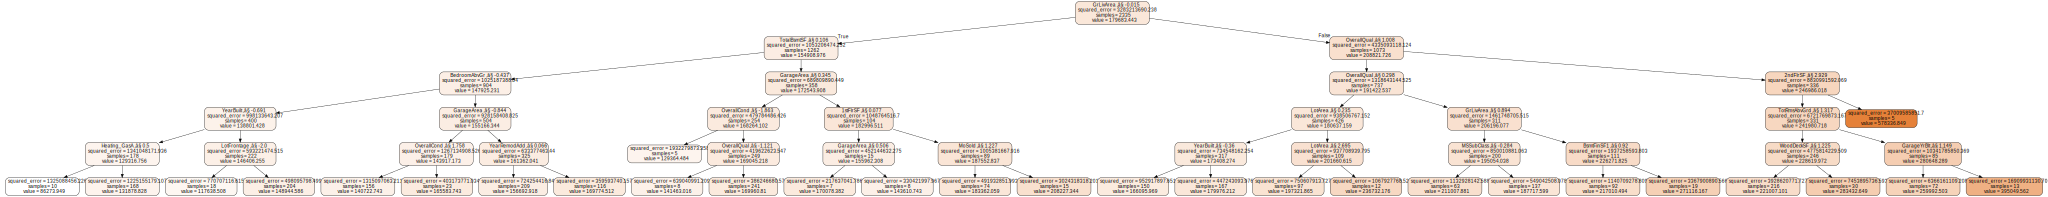

In [22]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(model,
                           out_file=None,
                           feature_names=X.columns,
                           filled=True,
                           rounded=True,
                           special_characters=True)

graph = graphviz.Source(dot_data)

# –û—Ç–æ–±—Ä–∞–∂–∞–µ–º –≥—Ä–∞—Ñ–∏–∫
graph


# ‚úîÔ∏è Random Forest Regressor

Random Forest (–°–ª—É—á–∞–π–Ω—ã–π –ª–µ—Å) ‚Äî —ç—Ç–æ –º–æ—â–Ω—ã–π –∞–ª–≥–æ—Ä–∏—Ç–º –º–∞—à–∏–Ω–Ω–æ–≥–æ –æ–±—É—á–µ–Ω–∏—è, –æ—Å–Ω–æ–≤–∞–Ω–Ω—ã–π –Ω–∞ **–∞–Ω—Å–∞–º–±–ª–µ —Ä–µ—à–µ–Ω–∏–π**. –û–Ω –æ–±—ä–µ–¥–∏–Ω—è–µ—Ç **–Ω–µ—Å–∫–æ–ª—å–∫–æ –¥–µ—Ä–µ–≤—å–µ–≤ —Ä–µ—à–µ–Ω–∏–π**, —á—Ç–æ–±—ã —Å–¥–µ–ª–∞—Ç—å –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –±–æ–ª–µ–µ —Ç–æ—á–Ω—ã–º–∏ –∏ —É—Å—Ç–æ–π—á–∏–≤—ã–º–∏.

### üîπ –ö–∞–∫ —Ä–∞–±–æ—Ç–∞–µ—Ç Random Forest?
1. **–°–æ–∑–¥–∞—ë—Ç –º–Ω–æ–≥–æ –¥–µ—Ä–µ–≤—å–µ–≤ —Ä–µ—à–µ–Ω–∏–π** –Ω–∞ —Ä–∞–∑–Ω—ã—Ö —Å–ª—É—á–∞–π–Ω—ã—Ö –ø–æ–¥–Ω–∞–±–æ—Ä–∞—Ö –¥–∞–Ω–Ω—ã—Ö.
2. **–ö–∞–∂–¥–æ–µ –¥–µ—Ä–µ–≤–æ –¥–µ–ª–∞–µ—Ç —Å–≤–æ—ë –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ**.
3. **–û–±—ä–µ–¥–∏–Ω—è–µ—Ç –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è** ‚Äî –≤ –∑–∞–¥–∞—á–∞—Ö –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –≤—ã–±–∏—Ä–∞–µ—Ç—Å—è –Ω–∞–∏–±–æ–ª–µ–µ —á–∞—Å—Ç—ã–π –æ—Ç–≤–µ—Ç (–≥–æ–ª–æ—Å–æ–≤–∞–Ω–∏–µ), –∞ –≤ —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ —É—Å—Ä–µ–¥–Ω—è—é—Ç—Å—è –ø—Ä–æ–≥–Ω–æ–∑—ã.

### üîπ –ü–æ—á–µ–º—É —ç—Ç–æ —Ä–∞–±–æ—Ç–∞–µ—Ç?
- **–°–Ω–∏–∂–∞–µ—Ç –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏–µ**: –æ—Ç–¥–µ–ª—å–Ω—ã–µ –¥–µ—Ä–µ–≤—å—è –º–æ–≥—É—Ç –±—ã—Ç—å –Ω–µ—Å—Ç–∞–±–∏–ª—å–Ω—ã–º–∏, –Ω–æ –∏—Ö –∞–Ω—Å–∞–º–±–ª—å –¥–∞—ë—Ç –±–æ–ª–µ–µ –Ω–∞–¥—ë–∂–Ω—ã–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç.
- **–≠—Ñ—Ñ–µ–∫—Ç–∏–≤–µ–Ω –Ω–∞ —Å–ª–æ–∂–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö**: —Ä–∞–±–æ—Ç–∞–µ—Ç —Å –±–æ–ª—å—à–∏–º–∏ –Ω–∞–±–æ—Ä–∞–º–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∏ —Å–ª–æ–∂–Ω—ã–º–∏ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—è–º–∏.
- **–ì–∏–±–∫–æ—Å—Ç—å**: –ø–æ–¥—Ö–æ–¥–∏—Ç –∫–∞–∫ –¥–ª—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏, —Ç–∞–∫ –∏ –¥–ª—è —Ä–µ–≥—Ä–µ—Å—Å–∏–∏.

In [23]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=1000)
rf_reg.fit(X_train, y_train)

test_pred = rf_reg.predict(X_test)
train_pred = rf_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Random Forest Regressor", *evaluate(y_test, test_pred), 0]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = pd.concat([results_df, results_df_2])

Test set evaluation:
_____________________________________
MAE: 29445.34799209259
MSE: 1662328051.8088644
RMSE: 40771.65745721977
R2 Square 0.4995978493485346
__________________________________
Train set evaluation:
_____________________________________
MAE: 10611.208579146534
MSE: 235645837.87149358
RMSE: 15350.760172430992
R2 Square 0.928227078678379
__________________________________


# ‚úîÔ∏è Boosting

Boosting (–±—É—Å—Ç–∏–Ω–≥) ‚Äî —ç—Ç–æ –¥—Ä—É–≥–æ–π –∞–Ω—Å–∞–º–±–ª–µ–≤—ã–π –º–µ—Ç–æ–¥, –Ω–æ –æ–Ω —Ä–∞–±–æ—Ç–∞–µ—Ç **–ø–æ-–¥—Ä—É–≥–æ–º—É**. –í–º–µ—Å—Ç–æ —Å–æ–∑–¥–∞–Ω–∏—è –Ω–µ–∑–∞–≤–∏—Å–∏–º—ã—Ö –¥–µ—Ä–µ–≤—å–µ–≤, –±—É—Å—Ç–∏–Ω–≥ —Å—Ç—Ä–æ–∏—Ç –º–æ–¥–µ–ª–∏ **–ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ**, –∫–∞–∂–¥–æ–µ –Ω–æ–≤–æ–µ –¥–µ—Ä–µ–≤–æ –∏—Å–ø—Ä–∞–≤–ª—è–µ—Ç –æ—à–∏–±–∫–∏ –ø—Ä–µ–¥—ã–¥—É—â–∏—Ö.

### üîπ –ö–∞–∫ —Ä–∞–±–æ—Ç–∞–µ—Ç Boosting?
1. **–°–æ–∑–¥–∞—ë—Ç—Å—è –ø–µ—Ä–≤–æ–µ —Å–ª–∞–±–æ–µ –¥–µ—Ä–µ–≤–æ**, –∫–æ—Ç–æ—Ä–æ–µ –¥–µ–ª–∞–µ—Ç –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è.
2. **–ê–Ω–∞–ª–∏–∑–∏—Ä—É—é—Ç—Å—è –æ—à–∏–±–∫–∏** –ø–µ—Ä–≤–æ–π –º–æ–¥–µ–ª–∏, –∏ —Å–ª–µ–¥—É—é—â–∏–µ –¥–µ—Ä–µ–≤—å—è –æ–±—É—á–∞—é—Ç—Å—è –Ω–∞ —ç—Ç–∏—Ö –æ—à–∏–±–∫–∞—Ö.
3. **–ö–∞–∂–¥–æ–µ –Ω–æ–≤–æ–µ –¥–µ—Ä–µ–≤–æ –∫–æ—Ä—Ä–µ–∫—Ç–∏—Ä—É–µ—Ç –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –ø—Ä–µ–¥—ã–¥—É—â–∏—Ö**, —É–ª—É—á—à–∞—è —Ç–æ—á–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–∏.
4. **–ò—Ç–æ–≥–æ–≤—ã–π –ø—Ä–æ–≥–Ω–æ–∑** ‚Äî —ç—Ç–æ –≤–∑–≤–µ—à–µ–Ω–Ω–∞—è —Å—É–º–º–∞ –≤—Å–µ—Ö –¥–µ—Ä–µ–≤—å–µ–≤.

### üîπ –ü–æ—á–µ–º—É Boosting —Ç–∞–∫ —Ö–æ—Ä–æ—à?
- **–û–±—É—á–∞–µ—Ç—Å—è –Ω–∞ –æ—à–∏–±–∫–∞—Ö**: –¥–µ–ª–∞–µ—Ç –º–æ–¥–µ–ª—å –±–æ–ª–µ–µ —Ç–æ—á–Ω–æ–π.
- **–ß–∞—Å—Ç–æ –ø—Ä–µ–≤–æ—Å—Ö–æ–¥–∏—Ç Random Forest** –ø–æ –∫–∞—á–µ—Å—Ç–≤—É –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π.
- **–ü–æ–ø—É–ª—è—Ä–Ω—ã–µ —Ä–µ–∞–ª–∏–∑–∞—Ü–∏–∏**: Gradient Boosting (GBM), XGBoost, LightGBM, CatBoost.



In [24]:
!pip install catboost

In [25]:
from google.colab import output
output.enable_custom_widget_manager()

In [26]:
import pandas as pd
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model = CatBoostRegressor(iterations=1000, learning_rate=0.05, depth=6, loss_function='RMSE', random_seed=42) #adjust params if needed
model.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=100, plot=True)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

# Create a DataFrame for the results
results_df_2 = pd.DataFrame(data=[["Catboost Regressor", *evaluate(y_test, test_pred), 0]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = pd.concat([results_df, results_df_2])

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 56266.4276522	test: 56617.2218826	best: 56617.2218826 (0)	total: 64.9ms	remaining: 1m 4s
100:	learn: 33454.1701781	test: 41204.4154249	best: 41204.4154249 (100)	total: 804ms	remaining: 7.16s
200:	learn: 28651.9833919	test: 40724.9214963	best: 40585.4970703 (182)	total: 1.81s	remaining: 7.21s
300:	learn: 25360.5664776	test: 40666.2454358	best: 40585.4970703 (182)	total: 2.74s	remaining: 6.37s
400:	learn: 23135.0028782	test: 40731.0168784	best: 40585.4970703 (182)	total: 4.3s	remaining: 6.42s
500:	learn: 21143.4878474	test: 40921.7638269	best: 40585.4970703 (182)	total: 6s	remaining: 5.98s
600:	learn: 19417.0838181	test: 41054.8636362	best: 40585.4970703 (182)	total: 8.93s	remaining: 5.93s
700:	learn: 18040.0185072	test: 41060.1654087	best: 40585.4970703 (182)	total: 11.8s	remaining: 5.04s
800:	learn: 16833.5068786	test: 41176.3107963	best: 40585.4970703 (182)	total: 13.3s	remaining: 3.31s
900:	learn: 15789.4584743	test: 41264.9791498	best: 40585.4970703 (182)	total: 14.9s	rema

In [27]:
model.get_feature_importance(prettified=True)

Feature Id  Importances
0               GrLivArea    17.401610
1             OverallQual     9.531083
2             TotalBsmtSF     5.920765
3                 LotArea     4.866570
4              BsmtFinSF1     4.287241
..                    ...          ...
300          SaleType_Oth     0.000000
301          SaleType_nan     0.000000
302  SaleCondition_Alloca     0.000000
303          LowQualFinSF     0.000000
304               MiscVal     0.000000

[305 rows x 2 columns]

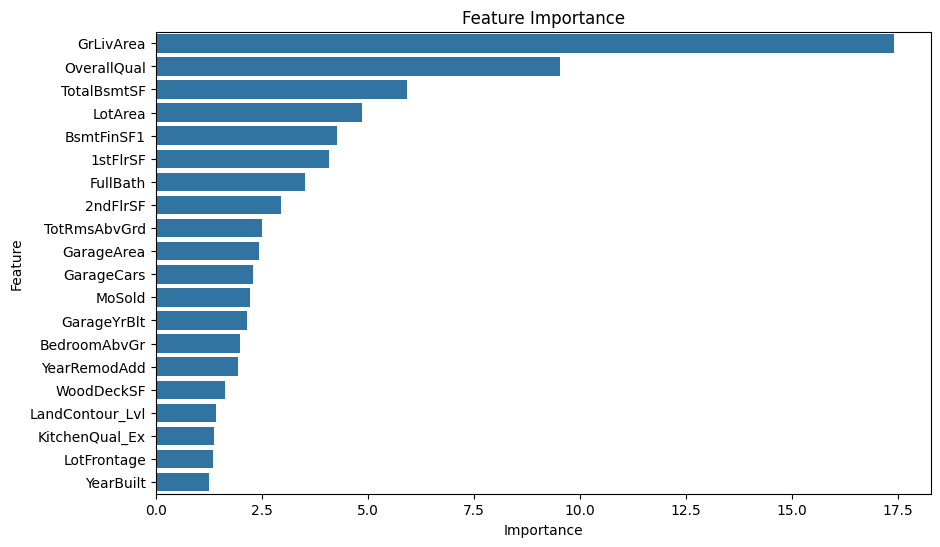

In [28]:
feature_importance = model.get_feature_importance(prettified=True)[:20]

plt.figure(figsize=(10, 6))
sns.barplot(x='Importances', y='Feature Id', data=feature_importance)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [29]:
results_df

Model           MAE           MSE          RMSE  \
0        Linear Regression  31485.075613  1.923818e+09  43861.347331   
0         Ridge Regression  29315.690903  1.688273e+09  41088.604904   
0         Lasso Regression  31734.818304  2.036713e+09  45129.957937   
0            Decision Tree  31929.563845  1.999915e+09  44720.409209   
0  Random Forest Regressor  29445.347992  1.662328e+09  40771.657457   
0       Catboost Regressor  29290.681312  1.647183e+09  40585.497122   

   R2 Square  Cross Validation  
0   0.420883          0.337056  
0   0.491788          0.387728  
0   0.386899          0.340909  
0   0.397976         -0.093049  
0   0.499598          0.000000  
0   0.504157          0.000000

# üìä Models Comparison

<Axes: ylabel='Model'>

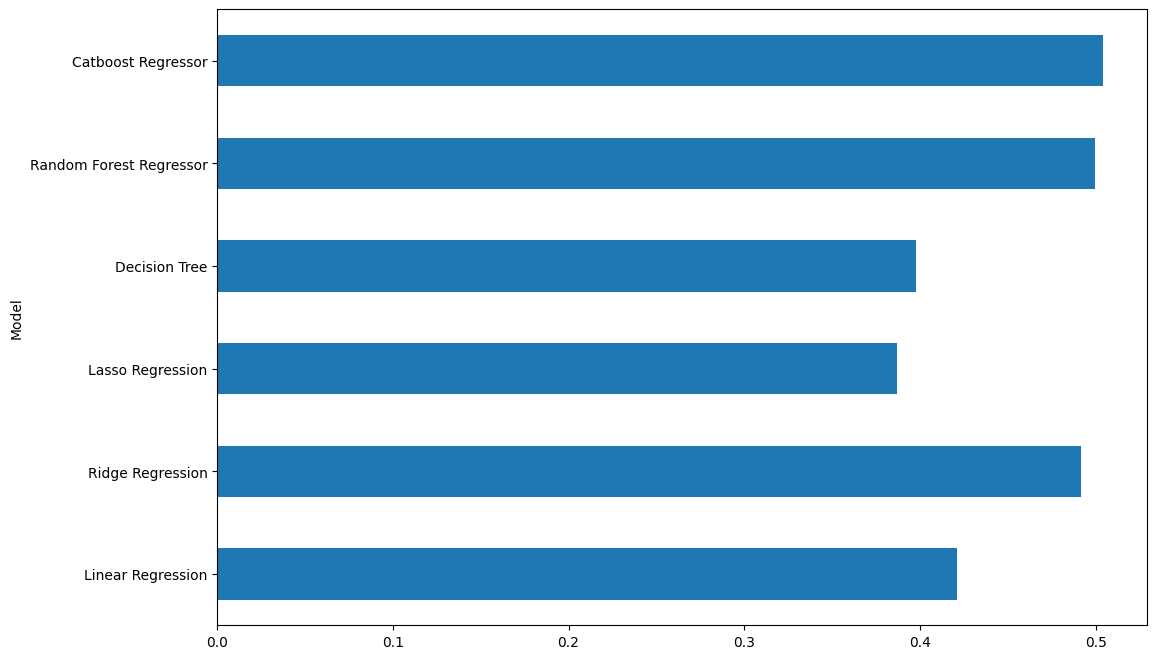

In [30]:
results_df.set_index('Model', inplace=True)
results_df['R2 Square'].plot(kind='barh', figsize=(12, 8))

In [31]:
from tqdm import tqdm

def compare_models(models, X_train, X_test, y_train, y_test):

  results = []
  for name, model in tqdm(models.items()):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae, mse, rmse, r2 = evaluate(y_test, y_pred)
    cv_score = cross_val(model)
    results.append([name, mae, mse, rmse, r2, cv_score])

  results_df = pd.DataFrame(results, columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
  results_df.set_index('Model', inplace=True)
  results_df

  return results_df

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42),
    "Lasso Regression": Lasso(alpha=0.1, precompute=True, positive=True, selection='random', random_state=42),
    "Decision Tree": DecisionTreeRegressor(max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=42),
    # "Random Forest": RandomForestRegressor(n_estimators=1000),
    "CatBoost": CatBoostRegressor(iterations=1000, learning_rate=0.05, depth=6, loss_function='RMSE', random_seed=42, verbose=0) # set verbose to 0
}


res = compare_models(models, X_train, X_test, y_train, y_test)
res


 40%|‚ñà‚ñà‚ñà‚ñà      | 2/5 [00:01<00:01,  1.61it/s]/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1581551282709.4866, tolerance: 766630396.670484
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1331020945314.3713, tolerance: 690913504.070067
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1225843656624.846, tolerance: 586564320.1619194
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/li

MAE           MSE          RMSE  R2 Square  \
Model                                                                    
Linear Regression  31485.075613  1.923818e+09  43861.347331   0.420883   
Ridge Regression   29315.690903  1.688273e+09  41088.604904   0.491788   
Lasso Regression   31734.818304  2.036713e+09  45129.957937   0.386899   
Decision Tree      31929.563845  1.999915e+09  44720.409209   0.397976   
CatBoost           29214.377123  1.705617e+09  41299.120086   0.486567   

                   Cross Validation  
Model                                
Linear Regression          0.337056  
Ridge Regression           0.449560  
Lasso Regression           0.346703  
Decision Tree              0.267747  
CatBoost                   0.432514

#–ü–æ–ø—Ä–æ–±—É–µ–º –ø–æ—Ä–∞–±–æ—Ç–∞—Ç—å —Å —Ñ–∏—á–∞–º–∏

In [32]:
import numpy as np
# Feature Engineering Ideas for House Prices Dataset


# Example of combining features (add these to your preprocessing steps):

def add_features(df):
  df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
  df['TotalBath'] = df['FullBath'] + df['HalfBath'] + df['BsmtFullBath'] + df['BsmtHalfBath']
  df['PorchArea'] = df['OpenPorchSF'] + df['EnclosedPorch'] + df['3SsnPorch'] + df['ScreenPorch']
  df['QualLivArea'] = df['OverallQual'] * df['GrLivArea']
  df['GarageScore'] = df['GarageCars'] * df['GarageArea']
  return df

# Example Usage after data loading and cleaning:
train_df_features = add_features(df)
test_df_features = add_features(df_test)

In [33]:
y_test = sample.copy()

merged_df_test = pd.merge(test_df_features, y_test, on='Id', how='left')
df_res = pd.concat([merged_df_test, train_df_features])

X = df_res.drop(['Id', 'SalePrice'], axis=1)
y = df_res['SalePrice']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
X_train, X_test = preprocess_data(X_train, X_test)

X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])

In [ ]:
compare_models(models, X_train, X_test, y_train, y_test)

 40%|‚ñà‚ñà‚ñà‚ñà      | 2/5 [00:02<00:02,  1.12it/s]/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1583621450282.8787, tolerance: 766630396.670484
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1308886928558.2363, tolerance: 690913504.070067
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1233438478815.016, tolerance: 586564320.1619194
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/li

# üîó –ü–æ–ª–µ–∑–Ω—ã–µ –º–∞—Ç–µ—Ä–∏–∞–ª—ã:
- üìò [–î–æ–∫—É–º–µ–Ω—Ç–∞—Ü–∏—è Scikit-learn](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning)
- üìò [–£—á–µ–±–Ω–∏–∫ –Ø–Ω–¥–µ–∫—Å–∞](https://education.yandex.ru/handbook/ml)

